# Predict Fix Page Duration
Inputs:
- timestamp
- duration_ms
- function_name
- page_num
- exclusive
- pool_size
- fifo_size
- lru_size

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data_path = './buffer_stats.csv'
df = pd.read_csv(data_path)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
timestamp,40000.0,NaN,NaN,NaN,1731699708.176075,0.754014,1731699707.0,1731699708.0,1731699708.0,1731699709.0,1731699709.0
duration_ms,40000.0,NaN,NaN,NaN,0.215772,0.209749,0.002,0.21,0.213,0.218,21.287
function_name,40000,1,fix_page,40000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
page_num,40000.0,NaN,NaN,NaN,199.840925,115.061173,0.0,101.0,200.0,299.0,400.0
exclusive,40000,1,shared,40000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pool_size,40000.0,NaN,NaN,NaN,10.0,0.0,10.0,10.0,10.0,10.0,10.0
fifo_size,40000.0,NaN,NaN,NaN,2.235875,0.614123,0.0,2.0,2.0,2.0,10.0
lru_size,40000.0,NaN,NaN,NaN,7.76205,0.626011,0.0,8.0,8.0,8.0,9.0


In [ ]:
# Naive MSE
df['avg_duration'] = df['duration_ms'].mean()
mse = mean_squared_error(df['duration_ms'], df['avg_duration'])
abse = mean_absolute_error(df['duration_ms'], df['avg_duration'])

(array([3.9931e+04, 3.2000e+01, 1.1000e+01, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 3.0000e+00, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.00000e-03, 7.11500e-01, 1.42100e+00, 2.13050e+00, 2.84000e+00,
        3.54950e+00, 4.25900e+00, 4.96850e+00, 5.67800e+00, 6.38750e+00,
        7.09700e+00, 7.80650e+00, 8.51600e+00, 9.22550e+00, 9.93500e+00,
        1.06445e+01, 1.13540e+01, 1.20635e+01, 1.27730e+01, 1.34825e+01,
        1.41920e+01, 1.49015e+01, 1.56110e+01, 1.63205e+01, 1.70300e+01,
        1.77395e+01, 1.84490e+01, 1.91585e+01, 1.98680e+01, 2.05775e+01,
        2.12870e+01]),
 <BarContainer object of 30 artists>)

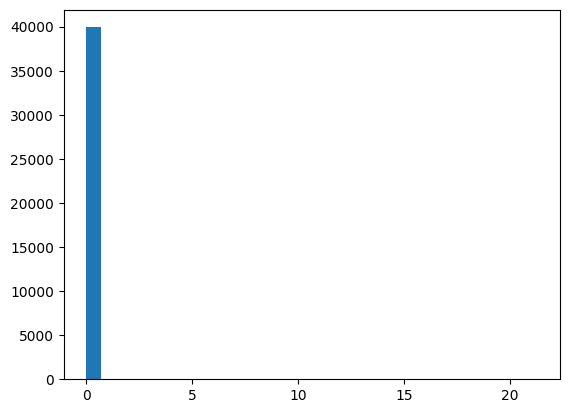

In [4]:
# Bin by duration
bins = [0,0.15, 0.3, 1, 5, 40]
df['duration_bins'] = pd.cut(df['duration_ms'], bins=bins)
df['duration_bins'].value_counts()
plt.hist(df['duration_ms'], bins=30)

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


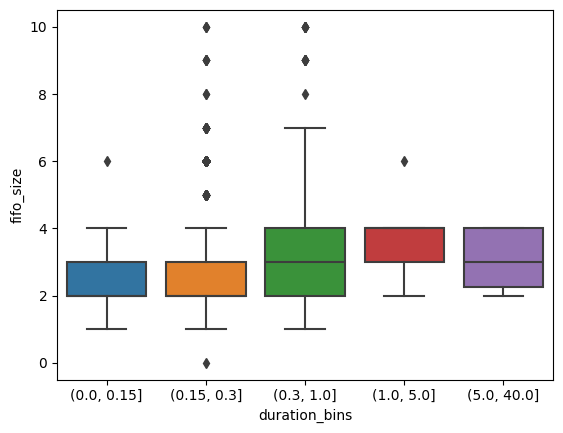

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='duration_bins', ylabel='lru_size'>

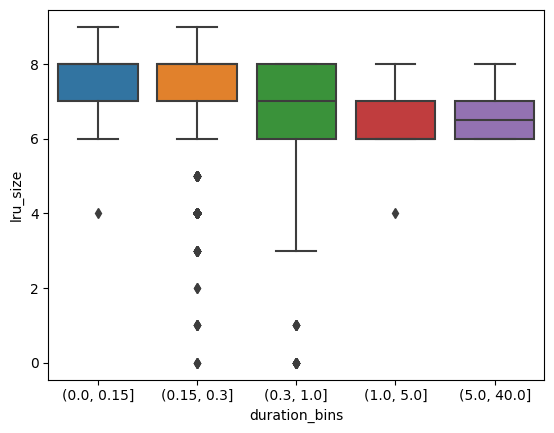

In [ ]:
# Is fifo size or lru size predictive?
sns.boxplot(data=df, x='duration_bins', y='fifo_size')
plt.show()
sns.boxplot(data=df, x='duration_bins', y='lru_size')

<Axes: xlabel='duration_ms', ylabel='Count'>

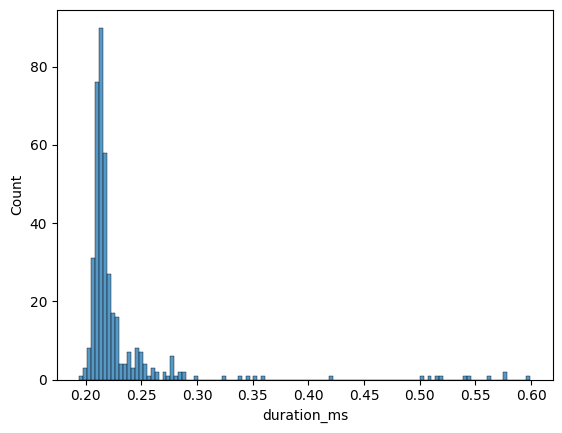

In [ ]:
# By page num
page_num_durations = df.groupby(by='page_num')['duration_ms'].mean()
sns.histplot(page_num_durations)

In [25]:
# How long ago the same page was accessed
first_access = df.groupby(by='page_num').apply(lambda x : x.index[0])
df['First Access'] = df.apply(lambda x: x.index == first_access[x['page_num']], axis=0)
df.head()

/var/folders/_c/j62lsd3n7x9_vq272kdsl3fc0000gn/T/ipykernel_92785/2218732828.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  first_access = df.groupby(by='page_num').apply(lambda x : x.index[0])


KeyError: 'page_num'